Read the dataset from the below link

In [2]:
import pandas as pd
Baby_Name = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
Baby_Name.head(5)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


1. Delete unnamed columns

In [5]:
Baby_Name1=Baby_Name.drop(Baby_Name.columns[Baby_Name.columns.str.contains('unnamed',case = False)],axis = 1)
Baby_Name1.head(5)

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


2. Show the distribution of male and female

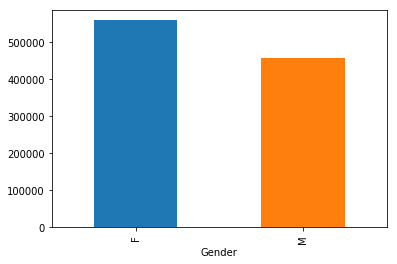

In [7]:
by_gender = Baby_Name.groupby('Gender')
by_gender.size().plot(kind='bar')

3.Show the top 5 most preferred names

In [8]:
df_top_freq = Baby_Name.groupby(['Name'])['Name'].agg({"Name_count": len}).sort_values(
    "Name_count", ascending=False).head(5).reset_index()
df_top_freq

C:\Users\vjanarthanan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Name,Name_count
0,Riley,1112
1,Avery,1080
2,Jordan,1073
3,Peyton,1064
4,Hayden,1049


4. What is the median name occurence in the dataset

In [32]:
Sorted=Baby_Name.sort_values(by='Name', ascending=True)
#Baby_Name.median(axis=0)
indexA=0
indexB=Sorted.count()
median_position = (indexA+indexB)/2
median_pos_Name=median_position.unique()
print("Median Name in ascending order Names list:")
Sorted.iloc[median_pos_Name]

Median Name in ascending order Names list:


,Unnamed: 0,Id,Name,Year,Gender,State,Count
746474,4197643,4197644,Jocelyn,2004,F,OR,42


5. Distribution of male and female born count by states

In [67]:
import numpy as np 
import pandas as pd
import seaborn as sns

Gender= Baby_Name["Gender"]
State= Baby_Name["State"]

df = pd.DataFrame({'Gender1':Gender,'State1':State})
ct= pd.crosstab(df.Gender1, df.State1)

stacked = ct.stack().reset_index().rename(columns={0:'value'})
stacked.head()

# pd.crosstab(Baby_Name["State"],Baby_Name["Gender"],margins=True).plot(kind='hist',bins=100)

,Gender1,State1,value
0,F,AK,2404
1,F,AL,9878
2,F,AR,7171
3,F,AZ,14518
4,F,CA,45144


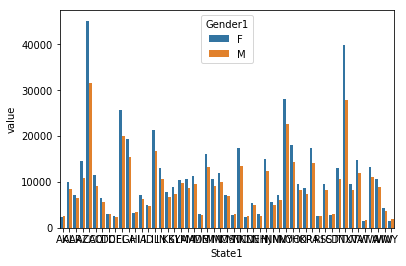

In [69]:
sns.barplot(x=stacked.State1, y=stacked.value,hue=stacked.Gender1)

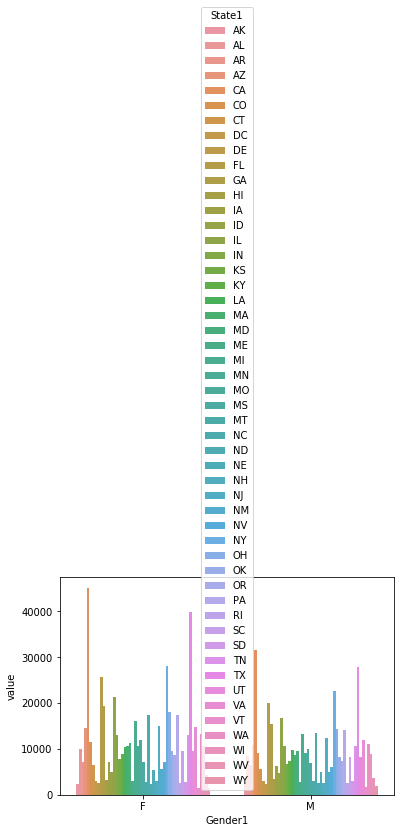

In [70]:
sns.barplot(x=stacked.Gender1, y=stacked.value,hue=stacked.State1)